# Installing and importing dependencies

In [1]:
!pip install openpyxl
!pip install pandas
!pip install numpy
!pip install rdkit

In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

Function that will be used to check that no "na" values appear:

In [3]:
def check_no_na(data):
    if data.isna().sum().eq(0).all():
        print("Success: No NA values found.")
        return
    print("Warning: NA values found.")

# Importing the dataset

In [4]:
df_raw=pd.read_excel("denmark.xlsx")
df_raw.head()

,Catalyst,Imine,Thiol,Output
0,O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl,SC1=CC=CC=C1C,3.134625
1,O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2,SC1=CC=C(OC)C=C1,1.531803
2,O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl,SC1=CC=CC=C1,1.074991
3,O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2,SC1=CC=CC=C1C,1.334823
4,O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C...,O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3,SC1=CC=CC=C1,1.743658


Some statistics to get an idea of how the output is distributed:

In [5]:
df_raw.describe()

,Output
count,1075.000000
mean,0.987658
std,0.700524
min,-0.419378
25%,0.473820
50%,1.050757
75%,1.370104
max,3.134625


Are there any "na" values?

In [6]:
check_no_na(df_raw)

Success: No NA values found.


# Looking at the data

How many different molecules are there?

In [37]:
unique_catalysts=df_raw["Catalyst"].unique()
unique_imines=df_raw["Imine"].unique()
unique_thiols=df_raw["Thiol"].unique()
pd.DataFrame({"Unique Catalysts": [unique_catalysts.shape[0]], "Unique Imines": [unique_imines.shape[0]], "Unique Thiols": [unique_thiols.shape[0]]})

,Unique Catalysts,Unique Imines,Unique Thiols
0,43,5,5


Show 3 random different Catalysts:

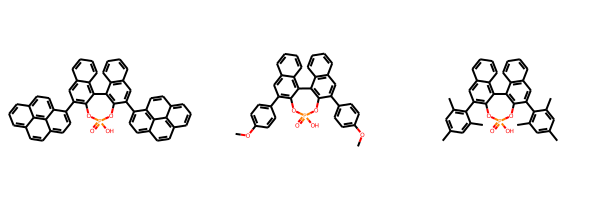

In [30]:
mol_list=[]
unique_molecules=df_raw["Imine"].unique()
for i in range(3):
    index=np.random.randint(0, unique_molecules.shape[0])
    mol_list.append(Chem.MolFromSmiles(unique_molecules[index]))
    unique_molecules=np.delete(unique_molecules,index)
Draw.MolsToGridImage(mol_list)

Show 3 random different Imine:

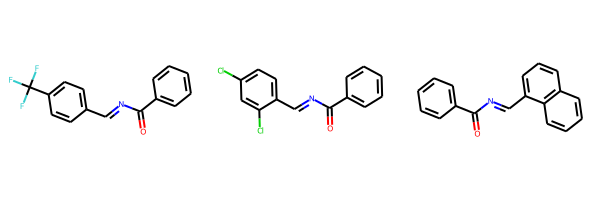

In [28]:
mol_list=[]
unique_molecules=df_raw["Imine"].unique()
for i in range(3):
    index=np.random.randint(0, unique_molecules.shape[0])
    mol_list.append(Chem.MolFromSmiles(unique_molecules[index]))
    unique_molecules=np.delete(unique_molecules,index)
Draw.MolsToGridImage(mol_list)

Show 3 random different Thiol:

['SC1=CC=CC=C1C' 'SC1=CC=C(OC)C=C1' 'SC1=CC=CC=C1' 'CCS' 'SC1CCCCC1']
['SC1=CC=CC=C1C' 'SC1=CC=C(OC)C=C1' 'SC1=CC=CC=C1' 'SC1CCCCC1']
['SC1=CC=CC=C1C' 'SC1=CC=CC=C1' 'SC1CCCCC1']


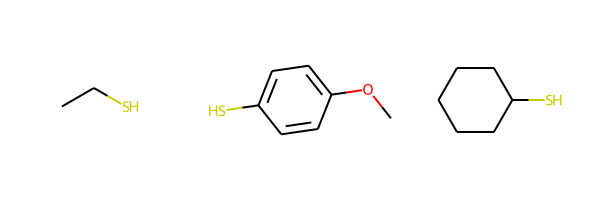

In [29]:
mol_list=[]
unique_molecules=df_raw["Thiol"].unique()
for i in range(3):
    index=np.random.randint(0, unique_molecules.shape[0])
    mol_list.append(Chem.MolFromSmiles(unique_molecules[index]))
    unique_molecules=np.delete(unique_molecules, index)
Draw.MolsToGridImage(mol_list)

# Preprocessing

Translating the "Catalyst", the "Imine" and the "Thiol" columns from SMILES to a RDKit molecule:

In [10]:
df_molecule_obj=df_raw[["Catalyst", "Imine", "Thiol"]].applymap(Chem.MolFromSmiles)
df_molecule_obj=pd.concat([df_molecule_obj, df_raw["Output"]],axis=1)
df_molecule_obj.head()

,Catalyst,Imine,Thiol,Output
0,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d00990>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d00580>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c1f2b0>,3.134625
1,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d008f0>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d00850>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c1f210>,1.531803
2,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d009e0>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c1f1c0>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c0da30>,1.074991
3,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d00a30>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c1f170>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c0d9e0>,1.334823
4,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0d00a80>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c1f300>,<rdkit.Chem.rdchem.Mol object at 0x7fd8c0c0d990>,1.743658


Verifying that all the smiles transfered successfuly. The RDKit documentaton states:

>or None on failure:
>
>> ```m = Chem.MolFromMolFile('data/invalid.mol')```
>>
>> ```m is None```
>
>True

So the "na" instances are counted and should be 0 if no problems were encountered:

In [11]:
check_no_na(df_molecule_obj)

Success: No NA values found.


Show 3 random Imine:

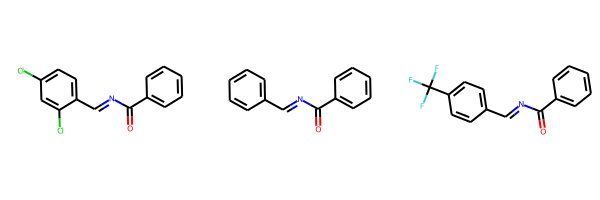

In [12]:
mol_list=[]
for i in range(3):
    mol_list.append(df_molecule_obj["Imine"][np.random.randint(0, df_molecule_obj.shape[0])])
Draw.MolsToGridImage(mol_list)

Show 3 random Catalysts:

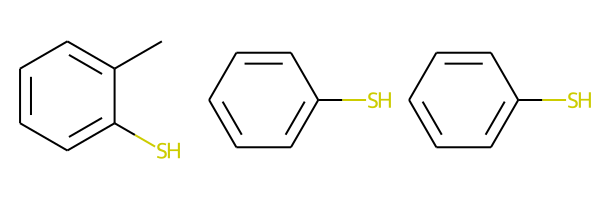

In [13]:
mol_list=[]
for i in range(3):
   mol_list.append(df_molecule_obj["Thiol"][np.random.randint(0, df_molecule_obj.shape[0])])
Draw.MolsToGridImage(mol_list)